In [3]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 41.7 MB/s eta 0:00:00


  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0     betts     mookie     605141  bettm001  bettsmo01          13611   

   mlb_played_first  mlb_played_last  
0            2014.0           2024.0  
Gathering Player Data
  pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         ST  2023-09-30           80.2          -2.65           5.76   
1         FF  2023-09-30           96.0          -2.62           6.12   
2         SL  2023-09-30           86.8          -2.55           5.91   
3         FF  2023-09-30           94.3          -2.80           6.01   
4         ST  2023-09-30           80.2          -2.95           5.63   

     player_name  batter  pitcher  events    description  ...  \
0  Betts, Mookie  605141   663941  single  hit_into_play  ...   
1  Betts, Mookie  605141   663941     NaN           ball  ...   
2  Betts, Mookie  605141   663941    walk           ball  ...   
3  Betts, Mookie  605141   663941     NaN           ba

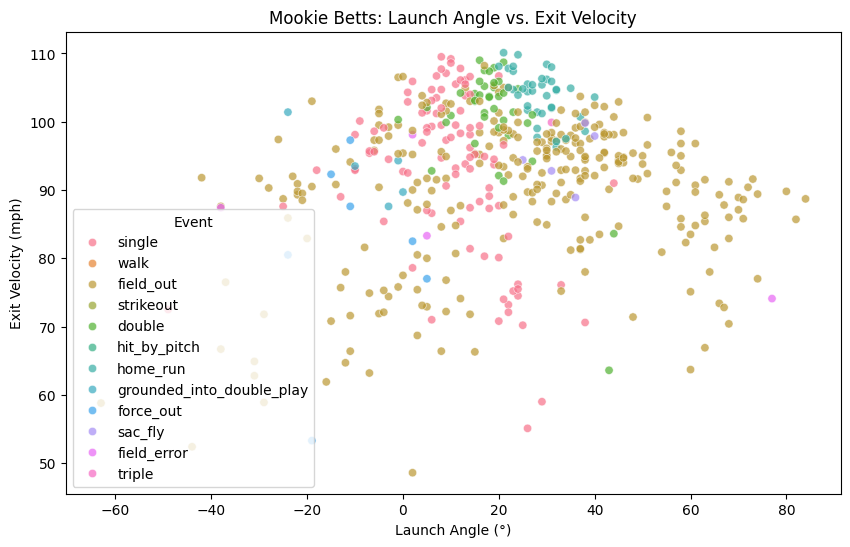

pitch_type
FO    93.850000
SI    88.757241
FF    87.225591
FC    86.323810
CH    85.970000
SL    85.322794
SV    84.800000
KC    82.700000
CU    82.125000
ST    81.232609
FS    81.027273
SC    63.700000
PO          NaN
Name: launch_speed, dtype: float64


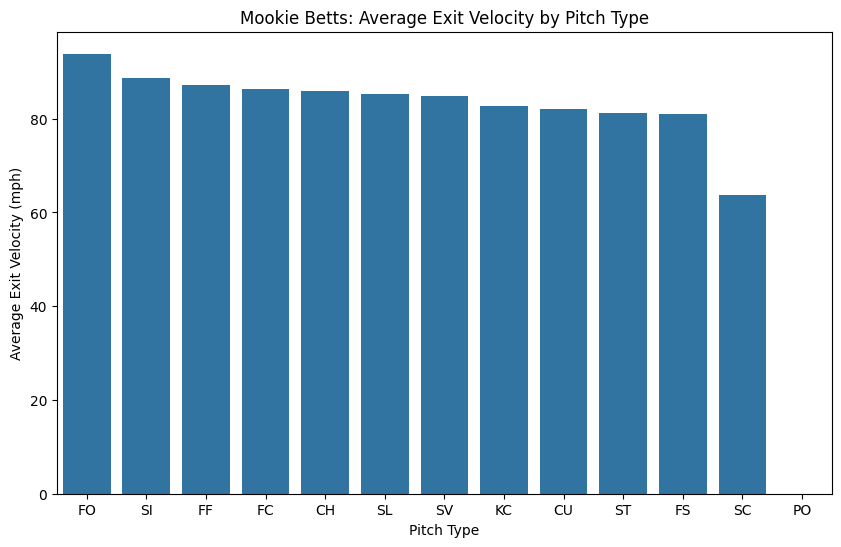

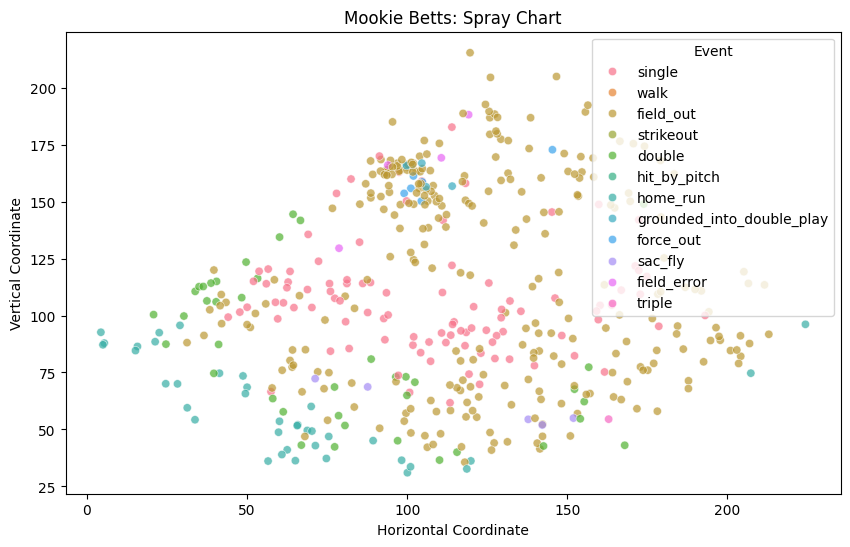

description pitch_type  ball  blocked_ball  Strike Called  Chased Pitch  \
0                   CH    77            10             24            33   
1                   CU    49             8             34            16   
2                   FC    86             8             47            36   
3                   FF   344             1            185           114   
4                   FO     2             0              0             2   
5                   FS    19             2              3             8   
6                   KC    14             2              8             4   
7                   PO     0             0              0             0   
8                   SC     0             0              0             0   
9                   SI   219             2            132            62   
10                  SL   150            17             84            57   
11                  ST    64             4             25            27   
12                  SV   

In [5]:
from pybaseball import playerid_lookup, statcast_batter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Look up Mookie Betts' MLBAM ID
player = playerid_lookup("Betts", "Mookie")
print(player)

# Fetch his MLBAM ID (from the lookup, it's 605141)
player_id = 605141

# Fetch Statcast data for Mookie Betts (2023 season)
stats = statcast_batter(start_dt="2023-04-01", end_dt="2023-09-30", player_id=player_id)

# Display the first few rows
print(stats.head())

# Save to CSV (optional)
stats.to_csv("mookie_betts_stats.csv", index=False)

# Scatter plot of launch angle vs. exit velocity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stats, x="launch_angle", y="launch_speed", hue="events", alpha=0.7)
plt.title("Mookie Betts: Launch Angle vs. Exit Velocity")
plt.xlabel("Launch Angle (\u00b0)")
plt.ylabel("Exit Velocity (mph)")
plt.legend(title="Event")
plt.show()

# Group by pitch type to calculate average exit velocity
pitch_analysis = stats.groupby("pitch_type")["launch_speed"].mean().sort_values(ascending=False)
print(pitch_analysis)

# Bar plot for pitch type performance
plt.figure(figsize=(10, 6))
sns.barplot(x=pitch_analysis.index, y=pitch_analysis.values)
plt.title("Mookie Betts: Average Exit Velocity by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Average Exit Velocity (mph)")
plt.show()

# Spray chart for batted ball locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stats, x="hc_x", y="hc_y", hue="events", alpha=0.7)
plt.title("Mookie Betts: Spray Chart")
plt.xlabel("Horizontal Coordinate")
plt.ylabel("Vertical Coordinate")
plt.legend(title="Event")
plt.show()

# Example: Calculate pitch outcomes by pitch type
outcomes = stats.groupby(["pitch_type", "description"]).size().unstack(fill_value=0)

# Rename descriptions to match your example
outcomes = outcomes.rename(columns={
    "swinging_strike": "Strike Swinging",
    "called_strike": "Strike Called",
    "foul": "Chased Pitch",
    "in_play": "Ball in Play"
})

# Reset index for display
outcomes = outcomes.reset_index()
print(outcomes)

# Define zones based on plate_x and plate_z
def assign_zone(row):
    if row["plate_x"] < -0.5:
        if row["plate_z"] < 1.5:
            return 7  # Bottom-left
        elif row["plate_z"] < 2.5:
            return 4  # Middle-left
        else:
            return 1  # Top-left
    elif row["plate_x"] > 0.5:
        if row["plate_z"] < 1.5:
            return 9  # Bottom-right
        elif row["plate_z"] < 2.5:
            return 6  # Middle-right
        else:
            return 3  # Top-right
    else:
        if row["plate_z"] < 1.5:
            return 8  # Bottom-middle
        elif row["plate_z"] < 2.5:
            return 5  # Middle-middle
        else:
            return 2  # Top-middle

# Assign zones to pitches
stats["Zone"] = stats.apply(assign_zone, axis=1)

# Calculate pitch counts by zone and pitch type
zone_data = stats.groupby(["Zone", "pitch_type"]).size().unstack(fill_value=0)
print(zone_data)




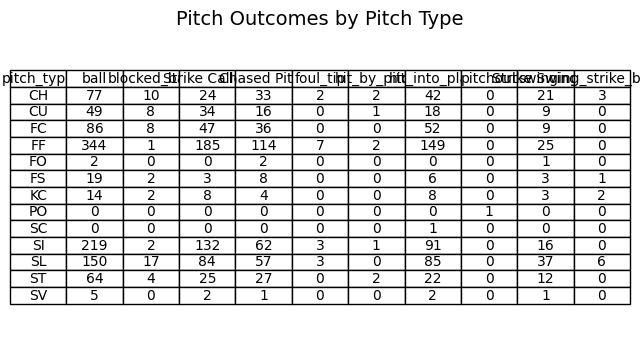

pitch_type  Changeup  Curveball  FC   FF  FO  FS  KC  PO  SC   SI  ST  SV  \
Zone                                                                        
1                 14          9  18  103   0   4   2   0   0   68   8   0   
2                 11         21  53  272   0   6   5   0   0   95  18   2   
3                 10          4  28  119   0   1   2   1   0   47  18   1   
4                 20          8  13   43   1   6   3   0   0   67   6   1   
5                 48         22  39  124   1   6   5   0   0  109  34   2   

pitch_type  Slider  
Zone                
1               17  
2               51  
3               28  
4               33  
5               98  


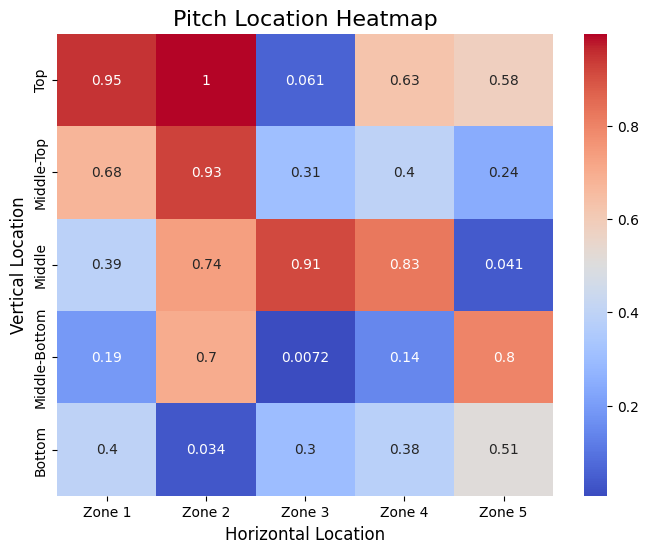

In [10]:
import matplotlib.pyplot as plt

# Visualize the pitch outcomes table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(
    cellText=outcomes.values,
    colLabels=outcomes.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Pitch Outcomes by Pitch Type", fontsize=14)
plt.show()

# Rename pitch types (optional for readability)
stats["pitch_type"] = stats["pitch_type"].replace({
    "FA": "Fastball",
    "SL": "Slider",
    "CU": "Curveball",
    "CH": "Changeup"
})

# Group by Zone and Pitch Type
zone_data = stats.groupby(["Zone", "pitch_type"]).size().unstack(fill_value=0)
print(zone_data.head())
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a random pitch grid (example data, replace with real values)
pitch_matrix = np.random.rand(5, 5)

# Define labels for pitching zones (optional)
x_labels = ["Zone 1", "Zone 2", "Zone 3", "Zone 4", "Zone 5"]
y_labels = ["Top", "Middle-Top", "Middle", "Middle-Bottom", "Bottom"]

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pitch_matrix, cbar=True, cmap="coolwarm", annot=True, xticklabels=x_labels, yticklabels=y_labels)

# Add a title and labels
plt.title("Pitch Location Heatmap", fontsize=16)
plt.xlabel("Horizontal Location", fontsize=12)
plt.ylabel("Vertical Location", fontsize=12)

# Show the plot
plt.show()

